In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [2]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [10]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-19:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-19:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSMeanPred = TS[len(TS)-19:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds.png")
    del fig
    gc.collect()

In [339]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerNound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-7:len(TS)-0].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-7:len(TS)-0].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSMeanPred = TS[len(TS)-7:len(TS)-0].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[6,7], hi_N= [9,11,7], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/test_preds.png")
    del fig
    gc.collect()

In [310]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions.csv" )
TS = get_TS()

In [311]:
predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [312]:
MeanRMSE = predictions['RMSE'].mean()

In [313]:
MeanRMSE

1.97087456407884

In [314]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
predsTest = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [315]:
params = ['Param1','Param2','Param3','Param4','Param5']

In [316]:
meanPred = np.mean(predictions[preds])

In [317]:
upperBound = meanPred + MeanRMSE

In [318]:
lowerBound = meanPred - MeanRMSE

In [319]:
RMSE = np.sqrt(np.mean((TS[-18:-6].values-meanPred)**2))

In [320]:
print meanPred.values
print TS[-18:-6].values

[ 3.08472708  2.19336735  1.36118593 -0.01750651 -1.43692784 -1.80938186
 -5.5356852   6.69279766  1.1227015   1.17129494  1.28039978 -0.15199172]
[ 2.53  4.13 -1.41  0.09 -1.86 -2.36 -5.09  7.91 -1.05  1.96  0.27  0.78]


In [321]:
meanTime = predictions['Time'].mean()

In [322]:
meanTime

331.1310000896454

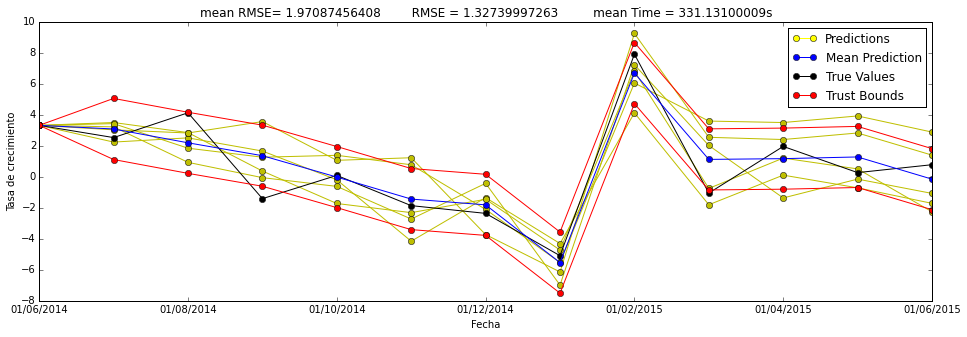

In [323]:
plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)

In [324]:
predictions.groupby(['Param1'])['RMSE'].max()

Param1
100    2.273144
300    1.928764
400    2.367699
Name: RMSE, dtype: float64

In [325]:
predictions.groupby(['Param1'])['RMSE'].min()

Param1
100    1.333822
300    1.928764
400    1.950944
Name: RMSE, dtype: float64

In [326]:
predictions['Time'].mean()

331.1310000896454

In [327]:
predictions[predictions['RMSE']<10].count()

Param1    5
Param2    5
Param3    5
Param4    5
Param5    5
Pred1     5
Pred2     5
Pred3     5
Pred4     5
Pred5     5
Pred6     5
Pred7     5
Pred8     5
Pred9     5
Pred10    5
Pred11    5
Pred12    5
MSE       5
Time      5
RMSE      5
dtype: int64

In [328]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions.csv" )

In [329]:
test_predictions[params]

,Param1,Param2,Param3,Param4,Param5
0,300,2.0,0.5,0.4,1.000000e-05
1,400,2.5,0.8,0.5,1.000000e-03
2,100,1.2,0.3,0.4,1.000000e-11
3,400,2.5,0.8,0.5,1.000000e-03
4,100,2.5,1.0,0.6,1.000000e-06


In [330]:
testmean= test_predictions[predsTest].mean()

In [331]:
test_predictions[predsTest].mean()

Pred1   -1.091151
Pred2   -1.390935
Pred3    2.515108
Pred4   -1.272118
Pred5   -1.651572
Pred6    4.254839
dtype: float64

In [332]:
test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [333]:
meantestRMSE = test_predictions['RMSE'].mean()
test_predictions = test_predictions[test_predictions['RMSE']<10]

In [334]:
testRMSE = RMSE = np.sqrt(np.mean((TS[-6:].values-testmean)**2))

In [ ]:
upperBound = testmean + meantestRMSE
lowerBound = testmean - meantestRMSE

In [335]:
test_predictions.count()

Param1    4
Param2    4
Param3    4
Param4    4
Param5    4
Pred1     4
Pred2     4
Pred3     4
Pred4     4
Pred5     4
Pred6     4
MSE       4
RMSE      4
dtype: int64

ValueError: Wrong number of items passed 12, placement implies 6

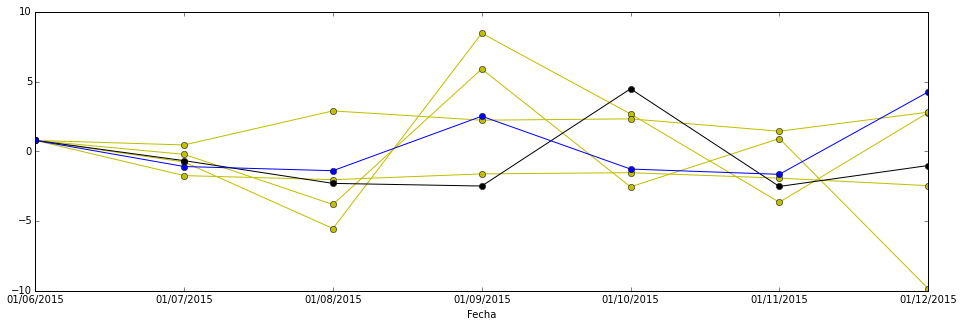

In [341]:
plot_TestSolutions(test_predictions[predsTest].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())